# **Phase 4 Project: Car Prices Prediction**
# Technical Analysis Notebook

Authored by Mikaela Connell


---



---
This notebook and the modeling notebook both work with the Car Price tabular data set found on this [Kaggle page](https://https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data).


# **Table of Contents**



*   Executive Summary
*   Basic Imports and Brief Dataset Overview
*   Descriptive Analysis
*  Statistical Analysis
*   Results
*   References



# **Executive Summary**


---
In this notebook, an exploratory data analysis is conducted on a tabular dataset containing prices of different vehicles. The goal of this project was to analyze vehicle sales data to identify key factors influencing price and gain insights into trends in the used car market. Using exploratory data analysis (EDA), statistical techniques, and machine learning models, I examined the relationships between attributes and their prices.

**Key Findings:**
* Price Determinants: Features such as vehicle condition, odometer reading, make, model, transmission type, and body style significantly impact selling price.

* Correlation Analysis: There is a strong negative correlation between odometer reading and selling price, while newer model years and better vehicle condition positively correlate with higher prices.

* Seasonal Trends: Time-based analysis showed fluctuations in average selling prices, indicating potential seasonality in vehicle sales.

* Feature Importance: Machine learning models identified odometer, make, model, and condition as the most influential variables in price prediction.

**Statistical Insights**:
* A T-test confirmed that automatic transmission vehicles generally have higher selling prices than manual vehicles.

* ANOVA analysis indicated significant price differences across body styles, with SUVs and trucks generally selling at higher prices than sedans.

* Regression analysis demonstrated a strong predictive relationship between odometer and price, with an R² score above 0.96 in machine learning models.

**Conclusion & Business Impact:**

* This analysis provides actionable insights for dealerships and individual sellers to price vehicles more effectively. By understanding key factors influencing price, sellers can make data-driven decisions to optimize profitability. Future work can explore time-series forecasting and expand feature engineering for improved accuracy.


# **Basic Imports and Brief Dataset Overview**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Read in CSV file
df = pd.read_csv('car_prices.csv')

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
# Find sum of null values for each column
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,96,973,1963,87,4,550297,64,46,17,14263,3766
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475915,22,82945,110970,244329,19693,5334


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df.nunique()

,0
year,34
make,96
model,973
trim,1963
body,87
transmission,4
vin,550297
state,64
condition,41
odometer,172278


In [3]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [4]:
#drop vin column
df.drop(columns='vin', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   state         472325 non-null  object 
 7   condition     472325 non-null  float64
 8   odometer      472325 non-null  float64
 9   color         472325 non-null  object 
 10  interior      472325 non-null  object 
 11  seller        472325 non-null  object 
 12  mmr           472325 non-null  float64
 13  sellingprice  472325 non-null  float64
 14  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 57.7+ MB


In [ ]:
df.columns.to_list()

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'mmr',
 'sellingprice',
 'saledate']

In [ ]:
# Drop sale date
df.drop(columns='saledate', inplace=True)

In [ ]:
# Drop mmr
df.drop(columns='mmr', inplace=True)

In [ ]:
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0


**Description of the dataset columns**:

1. **Year**: The manufacturing year of the vehicle (e.g., 2015)
2. **Make**: The brand or manufacturer of the vehicle (e.g., Kia, BMW, Volvo)
3. **Model**: The specific model of the vehicle (e.g., Sorento, 3 Series, S60, 6 Series Gran Coupe)
4. **Trim**: Additional designation for a particular version or option package of the model (e.g., LX, 328i SULEV, T5, 650i)
5. **Body**: The type of vehicle body (e.g., SUV, Sedan)
6. **Transmission**: The type of transmission in the vehicle (e.g., automatic)
7. **State**: The state in which the vehicle is located or registered (e.g., CA for California)
8. **Condition**: A numerical representation of the condition of the vehicle (e.g., 5.0)
9. **Odometer**: The mileage or distance traveled by the vehicle
10. **Color**: The exterior color of the vehicle
11. **Interior**: The interior color of the vehicle
12. **Seller**: The entity or company selling the vehicle (e.g., Kia Motors America Inc, Financial Services Remarketing)
13. **MMR**: Manheim Market Report, a pricing tool used in the automotive industry
14. **Selling Price**: The price at which the vehicle was sold
15. **Sale Date**: The date and time when the vehicle was sold

# **Descriptive Analysis**

1. What is the distribution of year production of all cars?

In [ ]:
year = df['year'].value_counts().sort_index()

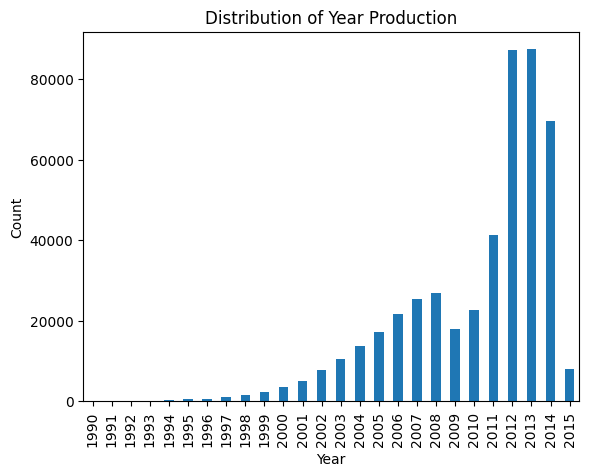

In [ ]:
# Create a bar graph showing the distribution of year
year.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Distribution of Year Production')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the graph
plt.show()

2. What are the 10 most common models in the dataset?

In [ ]:
model = df['model'].value_counts().head(10)

In [ ]:
model

,count
model,
Altima,16346
Fusion,12116
F-150,11950
Camry,10986
Escape,10656
Focus,9547
Accord,8528
Impala,7500
3 Series,7132


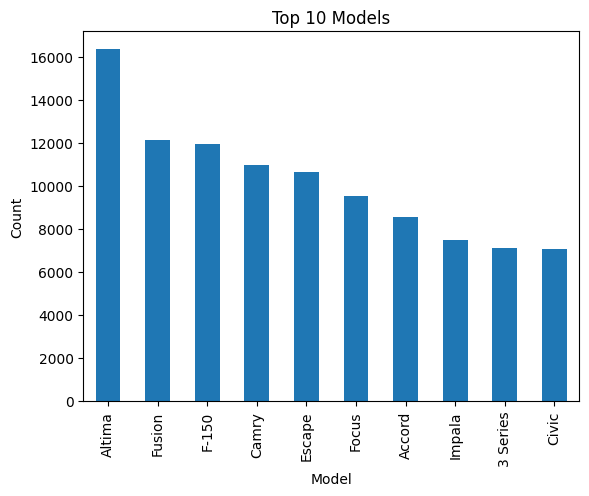

In [ ]:
# create a bar graph of the top 10 models
model.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Top 10 Models')
plt.xlabel('Model')
plt.ylabel('Count')

# Show the graph
plt.show()

3. What is the distribution of body among all cars?

In [ ]:
# Distribution of body among all cars
body = df['body'].value_counts().head(10)

In [ ]:
body

,count
body,
Sedan,174647
SUV,100347
sedan,36651
suv,20621
Hatchback,19351
Minivan,18305
Coupe,13121
Wagon,12023
Crew Cab,11508


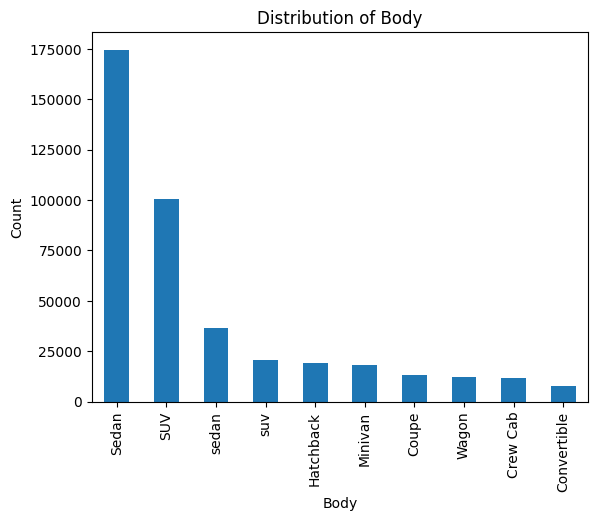

In [ ]:
# Create a bar graph of the top 10 body
body.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Distribution of Body')
plt.xlabel('Body')
plt.ylabel('Count')

# Show the graph
plt.show()

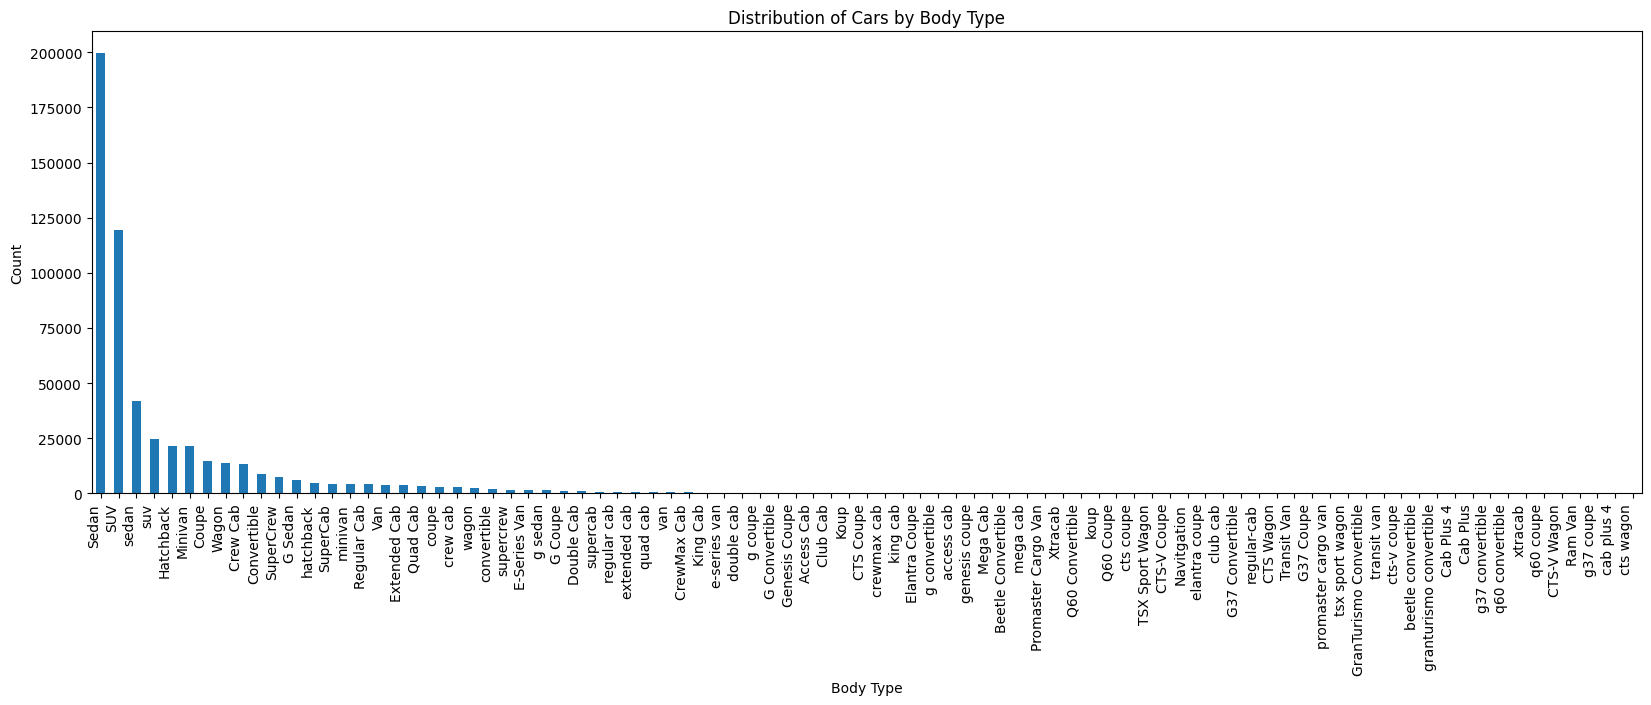

In [ ]:
plt.figure(figsize=(20, 6))
df['body'].value_counts().plot(kind='bar')
plt.title('Distribution of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

4. What is the distribution of transmissions?

In [ ]:
# transmission counts
transmission = df['transmission'].value_counts()
transmission

,count
transmission,
automatic,455963
manual,16362


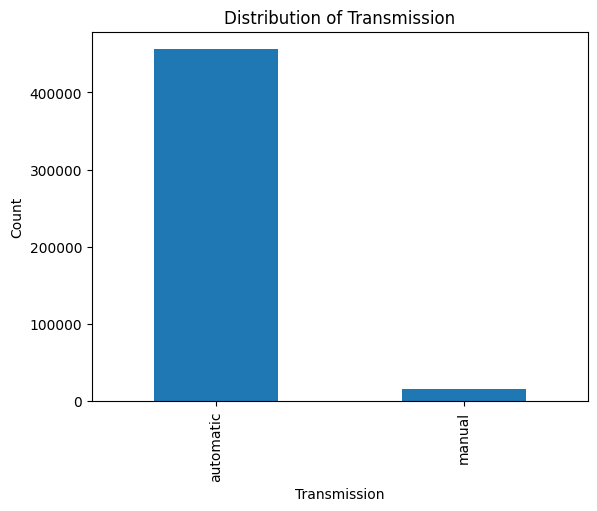

In [ ]:
# Show bar graph of transmission distribution
transmission.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')

# Show the graph
plt.show()

5. What is the distribution of condition?

In [ ]:
# Distribution of condition
condition = df['condition'].value_counts()
condition

,count
condition,
19.0,36647
35.0,23209
37.0,22680
44.0,22091
43.0,21593
42.0,21094
36.0,20164
41.0,19889
39.0,17567


6. What is the distribution of odometer?

In [ ]:
# Distribution of odometer
odometer = df['odometer'].value_counts()
odometer

,count
odometer,
1.0,979
999999.0,60
10.0,24
21587.0,19
33995.0,17
...,...
123979.0,1
128719.0,1
5559.0,1


7. What is the distribution of color?

In [ ]:
# Distribution of color
color = df['color'].value_counts().head(10)
color

,count
color,
black,93244
white,89233
silver,71251
gray,70640
blue,43060
red,37336
—,22068
gold,9563
green,9234


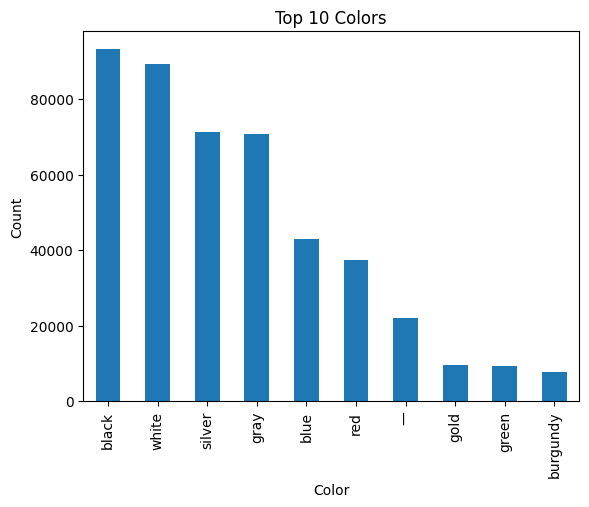

In [ ]:
# graph top 10 colors
color.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Top 10 Colors')
plt.xlabel('Color')
plt.ylabel('Count')

# Show the graph
plt.show()

8. What is the distribution of seller?

In [ ]:
# Distribution of seller
seller = df['seller'].value_counts()
seller

,count
seller,
ford motor credit company llc,17756
the hertz corporation,16286
nissan-infiniti lt,15777
santander consumer,14245
avis corporation,11471
...,...
tabark global auto,1
icon credit union,1
j & c auto sales of collier county inc,1


9. What is the distribution of selling price?

In [ ]:
# Distribution of selling price
selling_price = df['sellingprice'].value_counts()
selling_price

,count
sellingprice,
12000.0,3878
11000.0,3840
13000.0,3806
10000.0,3543
11500.0,3444
...,...
152000.0,1
72200.0,1
183000.0,1


In [ ]:
# Top 20 selling price
selling_price.head(20)

,count
sellingprice,
12000.0,3878
11000.0,3840
13000.0,3806
10000.0,3543
11500.0,3444
14000.0,3349
12500.0,3267
9000.0,3208
10500.0,3089


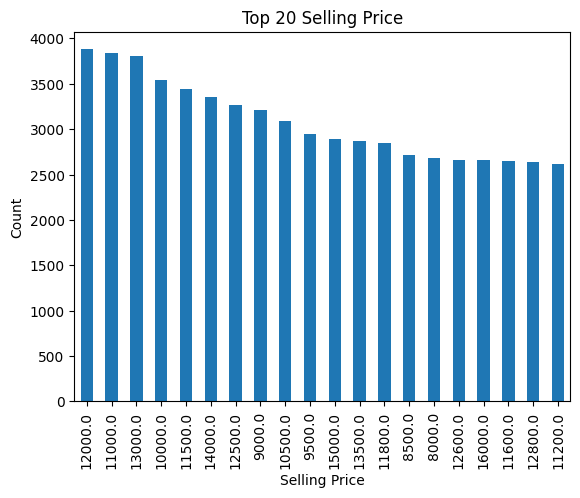

In [ ]:
# Graph top 20 selling price
selling_price.head(20).plot(kind='bar')

# Set the title and labels for the graph
plt.title('Top 20 Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')

# Show the graph
plt.show()

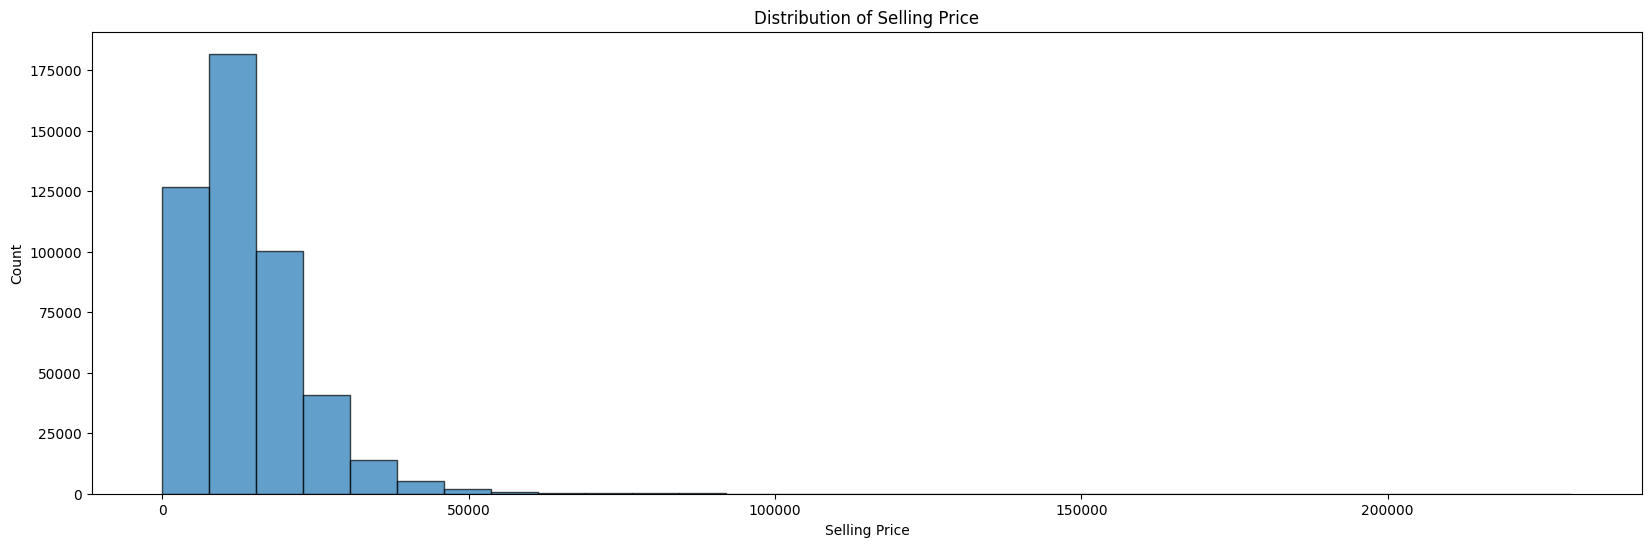

In [ ]:
# Histogram of prices
plt.figure(figsize=(20, 6))
plt.hist(df['sellingprice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

10. What is the correlation between the numerical columns?

In [6]:
#Correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

numerical_columns.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.334760,-0.773102,0.588614,0.578933
condition,0.334760,1.000000,-0.314205,0.276521,0.317712
odometer,-0.773102,-0.314205,1.000000,-0.582654,-0.577397
mmr,0.588614,0.276521,-0.582654,1.000000,0.983493
sellingprice,0.578933,0.317712,-0.577397,0.983493,1.000000




*   Year and odometer have a strong correlation (-0.773), which indicates that older cars tend to have a higher mileage.
*   The year and selling price have a strong positive correlation (0.579), indicating that newer cars tend to have higher selling prices.
* The condition column has positive correlation with other columns, but not as strong as some of the other correlations



In [9]:
custom_palette = ["#000000", "#FF0000"]  # Black and Red
#sns.set_palette(custom_palette)

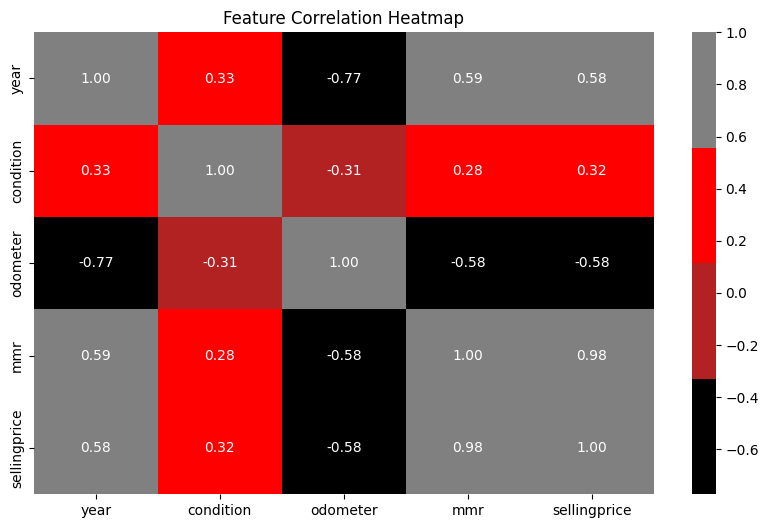

In [19]:
plt.figure(figsize=(10, 6))
cmap = sns.color_palette(["#000000", "#B22222", "#FF0000", "#808080"], as_cmap=True)
sns.heatmap(numerical_columns.corr(), annot=True, cmap=cmap, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Statistical Analysis**

# 1. T-test: Compare selling price for two groups (e.g., manual vs automatic transmission)

In [ ]:
# Create two groups: auto and manual
auto_prices = df[df['transmission'] == 'automatic']['sellingprice']
manual_prices = df[df['transmission'] == 'manual']['sellingprice']

In [ ]:
df['transmission'].value_counts()

,count
transmission,
automatic,475915
manual,17544
sedan,15
Sedan,11


In [ ]:
# Drop sedan from transmission column
df = df[df['transmission'] != 'sedan']
df = df[df['transmission'] != 'Sedan']

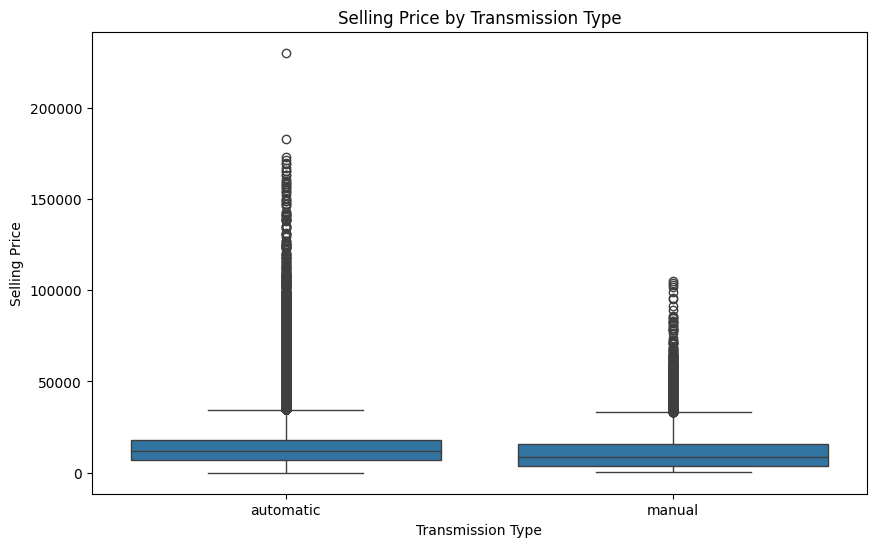

In [ ]:
# Create a graph to show the price for auto and manual
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='sellingprice', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

**Null hypothesis**: There is no significant difference in car price between automatic and manual transmissions.

**Alternate hypothesis**: There is a significant difference in car price between automatic and manual transmissions.

In [ ]:
def interpret_hypothesis_test(p_value, alpha):
    if p_value < alpha:
        print("Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.")
        print("\t –> `θ ≠ θ₀`")
    else:
        print("Testing has concluded in a FAILURE TO REJECT THE NULL HYPOTHESIS.")
        print("\t –> `θ = θ₀`")

In [ ]:
alpha = 0.05

In [ ]:
mean_auto = auto_prices.mean()
std_auto = auto_prices.std()
n_auto = len(auto_prices)

mean_manual = manual_prices.mean()
std_manual = manual_prices.std()
n_manual = len(manual_prices)

In [ ]:
from scipy.stats import ttest_ind_from_stats

In [ ]:
test_statistic, p_value = ttest_ind_from_stats(mean_auto, std_auto, n_auto, mean_manual, std_manual, n_manual, equal_var=False, alternative='two-sided')

In [ ]:
test_statistic, p_value

(np.float64(29.556400133153193), np.float64(1.1000162089720717e-187))

In [ ]:
interpret_hypothesis_test(p_value, alpha)

Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.
	 –> `θ ≠ θ₀`


This hypothesis test shows that there is a significant difference in price between manual and automatic transmission cars.

# 2. ANOVA: Compare selling price across multiple groups (e.g., different body types)

In [20]:
# Top 5 most common body types in dataset
df['body'].value_counts().head(5)

,count
body,
Sedan,174647
SUV,100347
sedan,36651
suv,20621
Hatchback,19351


In [21]:
# Top 3
sedan = df[df['body'].isin(['Sedan', 'sedan'])]
suv = df[df['body'].isin(['SUV', 'suv'])]
hatchback = df[df['body'] == 'Hatchback']

In [24]:
# Add a new column 'vehicle_type' to each DataFrame to label the categories
sedan['vehicle_type'] = 'Sedan'
suv['vehicle_type'] = 'SUV'
hatchback['vehicle_type'] = 'Hatchback'

<ipython-input-24-a1b2873f2fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedan['vehicle_type'] = 'Sedan'
<ipython-input-24-a1b2873f2fcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suv['vehicle_type'] = 'SUV'
<ipython-input-24-a1b2873f2fcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [25]:
# Combine all three DataFrames into one
combined_df = pd.concat([sedan, suv, hatchback])

In [33]:
# Create a custom color palette with red and black
custom_palette = ['#FF6666', '#FF0000', '#B30000']

<ipython-input-47-c0b631b2fbe6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vehicle_type', y='sellingprice', data=combined_df, palette=custom_palette, width=0.9, linewidth=2)


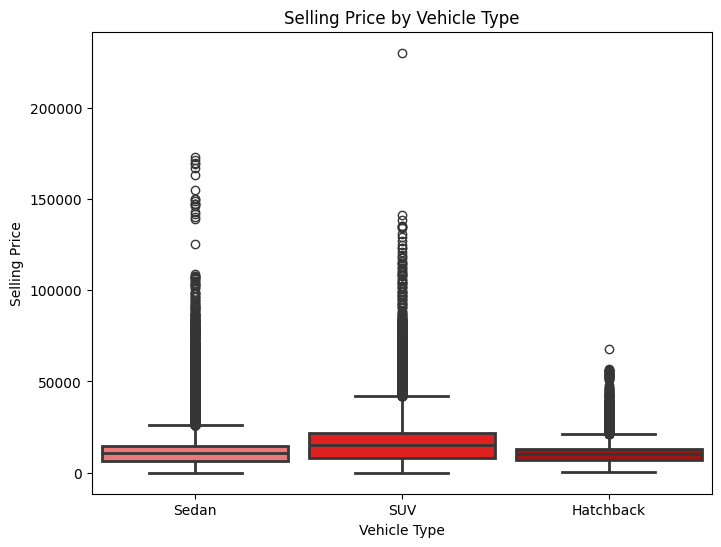

In [47]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='vehicle_type', y='sellingprice', data=combined_df, palette=custom_palette, width=0.9, linewidth=2)
plt.title('Selling Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Selling Price')
plt.show()

In [35]:
# show the average price of sedans, hatchback and suv
average_prices = df.groupby('body')['sellingprice'].mean()

# Print the average price for sedans, hatchbacks, and SUVs
print(average_prices[['Sedan', 'Hatchback', 'SUV']])


body
Sedan        11554.090932
Hatchback    10200.142577
SUV          16024.859517
Name: sellingprice, dtype: float64


<ipython-input-44-1c1040f7af9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vehicle_type', data=combined_df, palette=['#D50000', '#C70039', '#B71C1C'])


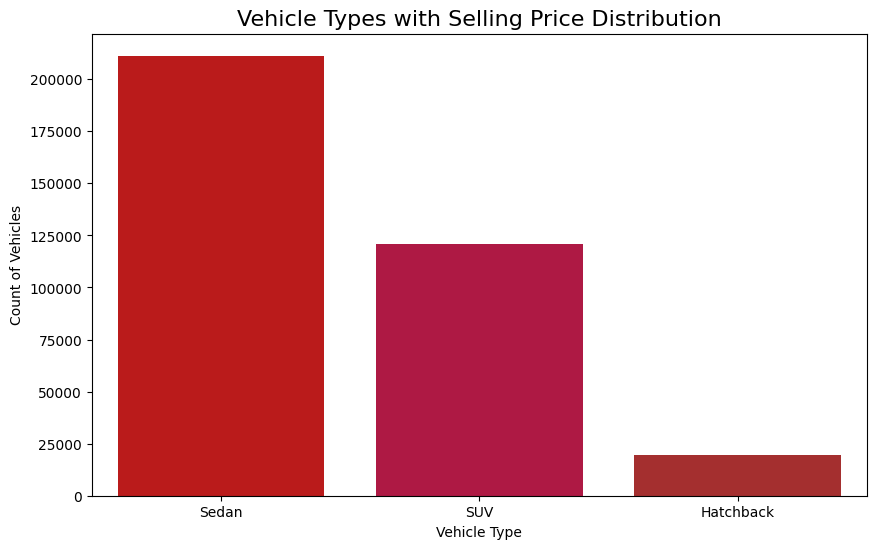

In [44]:
# Create a stacked bar chart showing selling price distribution by vehicle type
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicle_type', data=combined_df, palette=['#D50000', '#C70039', '#B71C1C'])
plt.title('Vehicle Types with Selling Price Distribution', fontsize=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Count of Vehicles')
plt.show()

In [29]:
from scipy.stats import f_oneway

In [30]:
# Run an ANOVA test to see if these different body types affect car price

f_statistic, p_value = f_oneway(sedan['sellingprice'], suv['sellingprice'], hatchback['sellingprice'])

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the selling price of cars with different bodies.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the selling price of cars with different bodies.")

F-statistic: 11158.541321272862
P-value: 0.0
Reject the null hypothesis. There is a significant difference in the selling price of cars with different bodies.
